In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime, timedelta
import os, sys
import urllib3
import time
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
sys.path.append(os.path.abspath(os.path.join(os.path.dirname("."), '..')))
from DataBase.DBUtilities import BRVMDatabase, DataPreProcessor
from Implementation.stock_factorial_analysis import FactorAnalytics, SupervisedScorer
from Implementation.Price_Driven_Analytics import PriceDrivenStrategy
from Implementation.backtesting import Backtester

In [3]:
kl_db = BRVMDatabase("KAN.db")
kl_db.status()

Table status (rows):
per_data : 784 rows of ['Ticker', 'Stock_Description', 'Nombre_titres_echanges', 'Valeur_echangee', 'PER', 'Valeur_globale_echangee_pct', 'Date']
stock_prices : 94927 rows of ['Date', 'Ticker', 'Description', 'Open', 'High', 'Low', 'Close', 'Volume']
indices_performances : 1400 rows of ['Date', 'Ticker', 'Description', 'Open', 'High', 'Low', 'Close', 'Volume']
fundamental_data : 138 rows of ['Ticker', 'Volume', 'Next Earnings Date', 'Market Cap', 'Revenue', 'Average 3m Volume', 'EPS', 'P/E Ratio', 'Beta', 'Dividend', 'Yield', 'Daily Trend', 'Weekly Trend', 'Monthly Trend', '1 Day perf', '1 Week perf', '1 Month perf', 'YTD', '1 Year perf', '3 Years perf', 'Date']
market_cap : 588 rows of ['Ticker', 'Date', 'stock_description', 'stock_number', 'floting_cap', 'globale_cap', 'globale_cap_pct', 'trade_number', 'trade_value', 'globale_trade_value_pct', 'PER']


{'per_data': "784 rows of ['Ticker', 'Stock_Description', 'Nombre_titres_echanges', 'Valeur_echangee', 'PER', 'Valeur_globale_echangee_pct', 'Date']",
 'stock_prices': "94927 rows of ['Date', 'Ticker', 'Description', 'Open', 'High', 'Low', 'Close', 'Volume']",
 'indices_performances': "1400 rows of ['Date', 'Ticker', 'Description', 'Open', 'High', 'Low', 'Close', 'Volume']",
 'fundamental_data': "138 rows of ['Ticker', 'Volume', 'Next Earnings Date', 'Market Cap', 'Revenue', 'Average 3m Volume', 'EPS', 'P/E Ratio', 'Beta', 'Dividend', 'Yield', 'Daily Trend', 'Weekly Trend', 'Monthly Trend', '1 Day perf', '1 Week perf', '1 Month perf', 'YTD', '1 Year perf', '3 Years perf', 'Date']",
 'market_cap': "588 rows of ['Ticker', 'Date', 'stock_description', 'stock_number', 'floting_cap', 'globale_cap', 'globale_cap_pct', 'trade_number', 'trade_value', 'globale_trade_value_pct', 'PER']"}

In [5]:
kl_db.update()
#kl_db.insert_3m_histo_data()

=====================Before daily update:=============================

Table status (rows):
per_data : 784 rows of ['Ticker', 'Stock_Description', 'Nombre_titres_echanges', 'Valeur_echangee', 'PER', 'Valeur_globale_echangee_pct', 'Date']
stock_prices : 95843 rows of ['Date', 'Ticker', 'Description', 'Open', 'High', 'Low', 'Close', 'Volume']
indices_performances : 1400 rows of ['Date', 'Ticker', 'Description', 'Open', 'High', 'Low', 'Close', 'Volume']
fundamental_data : 138 rows of ['Ticker', 'Volume', 'Next Earnings Date', 'Market Cap', 'Revenue', 'Average 3m Volume', 'EPS', 'P/E Ratio', 'Beta', 'Dividend', 'Yield', 'Daily Trend', 'Weekly Trend', 'Monthly Trend', '1 Day perf', '1 Week perf', '1 Month perf', 'YTD', '1 Year perf', '3 Years perf', 'Date']
market_cap : 588 rows of ['Ticker', 'Date', 'stock_description', 'stock_number', 'floting_cap', 'globale_cap', 'globale_cap_pct', 'trade_number', 'trade_value', 'globale_trade_value_pct', 'PER']

=====================Begin daily update:

In [134]:
pds = PriceDrivenStrategy()
df_signal = pds.average_vs_current_signal(window=504)
display(df_signal)

,Date,HistoricalAverage,CurrentPrice,GapPct,Action
Ticker,,,,,
ABJC,2025-07-07,1691,1690,-0.00%,keep
BICB,2025-07-07,5424,5200,-4.00%,keep
BICC,2025-07-07,10381,16500,59.00%,sell
BNBC,2025-07-07,1281,1400,9.00%,keep
BOAB,2025-07-07,5517,4410,-20.00%,buy
BOABF,2025-07-07,3430,3400,-1.00%,keep
BOAC,2025-07-07,4285,6000,40.00%,sell
BOAM,2025-07-07,1533,3095,102.00%,sell
BOAN,2025-07-07,3086,2540,-18.00%,buy


In [6]:
kl_db.get_most_recent_data("stock_prices")

,Date,Ticker,Description,Open,High,Low,Close,Volume
0,2025-08-04,ABJC,SERVAIR ABIDJAN CI,1700.0,1720.0,1700.0,1720.0,705.0
1,2025-08-04,BICB,BANQUE INTERNATIONALE POUR LE COMMERCE DU BENIN,5280.0,5280.0,5250.0,5250.0,298.0
2,2025-08-04,BICC,BICICI,16505.0,16515.0,16505.0,16515.0,36.0
3,2025-08-04,BNBC,BERNABE CI,1295.0,1295.0,1250.0,1250.0,607.0
4,2025-08-04,BOAB,BANK OF AFRICA BENIN,4300.0,4300.0,4300.0,4300.0,1287.0
5,2025-08-04,BOABF,BANK OF AFRICA BURKINA FASO,3480.0,3580.0,3480.0,3580.0,19381.0
6,2025-08-04,BOAC,BANK OF AFRICA CI,5990.0,5990.0,5990.0,5990.0,3665.0
7,2025-08-04,BOAM,BANK OF AFRICA MALI,3400.0,3400.0,3390.0,3390.0,5316.0
8,2025-08-04,BOAN,BANK OF AFRICA NIGER,2505.0,2510.0,2505.0,2510.0,347.0
9,2025-08-04,BOAS,BANK OF AFRICA SENEGAL,4445.0,4445.0,4400.0,4400.0,2376.0


In [7]:
features_cols = ['Momentum_1M','Momentum_3M','Volatility_1W','Volatility_1M','Volume_5d','RelativePrice_1M','PER','Yield','floting_cap']
fact_an = FactorAnalytics()

In [8]:
pca_df = fact_an.do_factors_analysis(features_cols)

AttributeError: 'FactorAnalytics' object has no attribute 'rolling_pca_df'

In [ ]:
pca_df2 = fact_an.do_factors_analysis(features_cols+["Beta"])

In [ ]:
fact_an.plot_pca_scatter()

In [ ]:
df = fact_an.build_features()

In [ ]:
kdb = BRVMDatabase("KAN.db")
# update_data(kdb, True)
# rank_all_stock(kdb)
# df1 = do_picking_analysis()
# df2 = do_factors_analysis()
bt = Backtester(kdb, start_date="2025-01-01")
df = bt.backtest_score()
res = bt.plot_cumulative_returns()

In [ ]:
df

In [ ]:
print(bt.pca_df['Ret_1M_fwd'].describe())
print("\n\n",bt.pca_df['Ret_1M_fwd'].sort_values(ascending=False).head(10))

In [ ]:
bt.pca_df[['PCA_Score', 'Ret_1M_fwd']].corr()

In [9]:
for i in range(1, bt.factors_analyser.pca_model.n_components + 1):
    corr = bt.pca_df[[f'PC{i}', 'Ret_1M_fwd']].corr().iloc[0, 1]
    print(f'Corr(PC{i}, Ret_1M_fwd) = {corr:.4f}')


NameError: name 'bt' is not defined

In [10]:
bt.pca_df.dropna()

NameError: name 'bt' is not defined

In [12]:
fa = FactorAnalytics(start_date="2025-01-01")
df = fa.build_features()
rolling_pca_df = fa.rolling_pca(df, window_days=252)

In [13]:
rolling_pca_df

,PC1,PC2,PC3,Date,Ticker,Ret_1M_fwd,Window_End
0,-0.088808,-0.059450,-0.856692,2018-01-02 00:00:00,ABJC,-0.145946,2019-01-10 00:00:00
1,-0.079391,-0.145275,-0.204700,2018-01-02 00:00:00,CIEC,-0.140811,2019-01-10 00:00:00
2,-0.186485,0.521968,0.255639,2018-01-02 00:00:00,SIBC,-0.055769,2019-01-10 00:00:00
3,-0.211251,0.975399,0.059339,2018-01-02 00:00:00,ECOC,-0.158070,2019-01-10 00:00:00
4,0.312498,-0.411861,-0.106775,2018-01-02 00:00:00,SHEC,0.046512,2019-01-10 00:00:00
...,...,...,...,...,...,...,...
15663183,1.980125,-0.881897,0.215333,2025-06-26,STBC,NaN,2025-06-26
15663184,-0.345039,-0.024018,-0.309123,2025-06-26,ONTBF,NaN,2025-06-26
15663185,-0.277876,-0.484020,-1.053003,2025-06-26,ORAC,NaN,2025-06-26
15663186,1.363560,-0.572588,0.075197,2025-06-26,PALC,NaN,2025-06-26


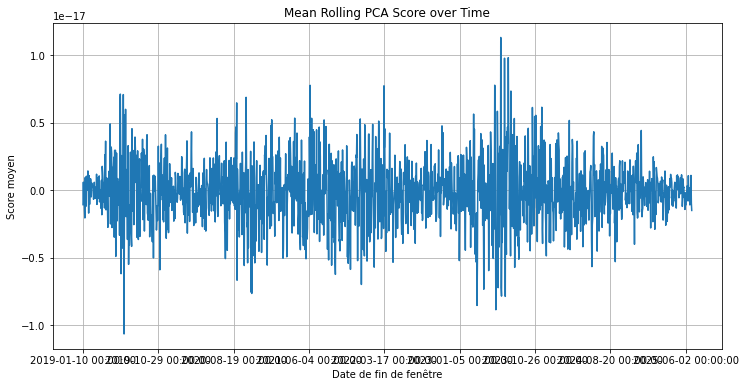

In [15]:
plt.figure(figsize=(12, 6))
rolling_pca_scored.groupby("Window_End")["Rolling_PCA_Score"].mean().plot()
plt.title("Mean Rolling PCA Score over Time")
plt.ylabel("Score moyen")
plt.xlabel("Date de fin de fenêtre")
plt.grid()
plt.show()


In [16]:
rolling_pca_scored

,PC1,PC2,PC3,Date,Ticker,Ret_1M_fwd,Window_End,Rolling_PCA_Score
0,-0.088808,-0.059450,-0.856692,2018-01-02 00:00:00,ABJC,-0.145946,2019-01-10 00:00:00,-0.005520
1,-0.079391,-0.145275,-0.204700,2018-01-02 00:00:00,CIEC,-0.140811,2019-01-10 00:00:00,0.000131
2,-0.186485,0.521968,0.255639,2018-01-02 00:00:00,SIBC,-0.055769,2019-01-10 00:00:00,-0.021322
3,-0.211251,0.975399,0.059339,2018-01-02 00:00:00,ECOC,-0.158070,2019-01-10 00:00:00,-0.036183
4,0.312498,-0.411861,-0.106775,2018-01-02 00:00:00,SHEC,0.046512,2019-01-10 00:00:00,0.023817
...,...,...,...,...,...,...,...,...
15663183,1.980125,-0.881897,0.215333,2025-06-26,STBC,NaN,2025-06-26,-0.086930
15663184,-0.345039,-0.024018,-0.309123,2025-06-26,ONTBF,NaN,2025-06-26,0.031606
15663185,-0.277876,-0.484020,-1.053003,2025-06-26,ORAC,NaN,2025-06-26,0.072400
15663186,1.363560,-0.572588,0.075197,2025-06-26,PALC,NaN,2025-06-26,-0.057826


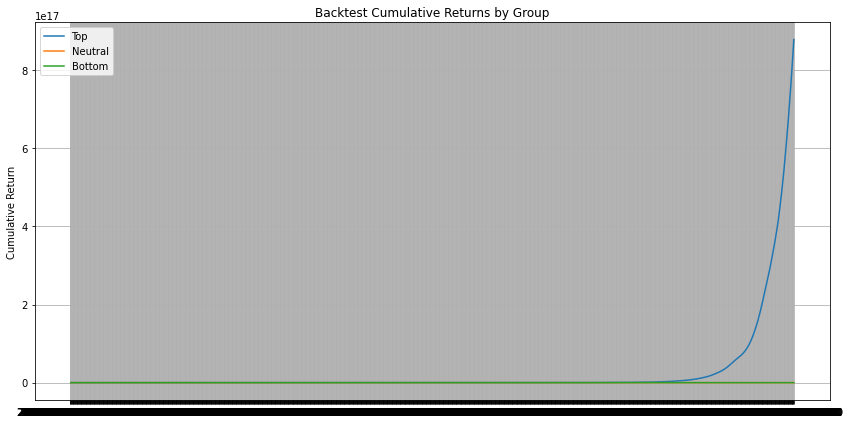

strategy,Bottom,Neutral,Top
Window_End,,,
2019-01-10 00:00:00,NaN,NaN,NaN
2019-01-11 00:00:00,NaN,NaN,NaN
2019-01-14 00:00:00,-0.047740,-5.117027e-02,3.743073e-03
2019-01-15 00:00:00,-0.070258,-7.638900e-02,5.656924e-03
2019-01-16 00:00:00,-0.092210,-1.009220e-01,7.608961e-03
...,...,...,...
2025-06-19,-0.999836,1.257668e+07,8.068404e+17
2025-06-20,-0.999832,1.300448e+07,8.242278e+17
2025-06-23,-0.999829,1.344923e+07,8.420403e+17


In [26]:
FactorAnalytics().backtest_from_rolling(rolling_pca_scored, "Rolling_PCA_Score")

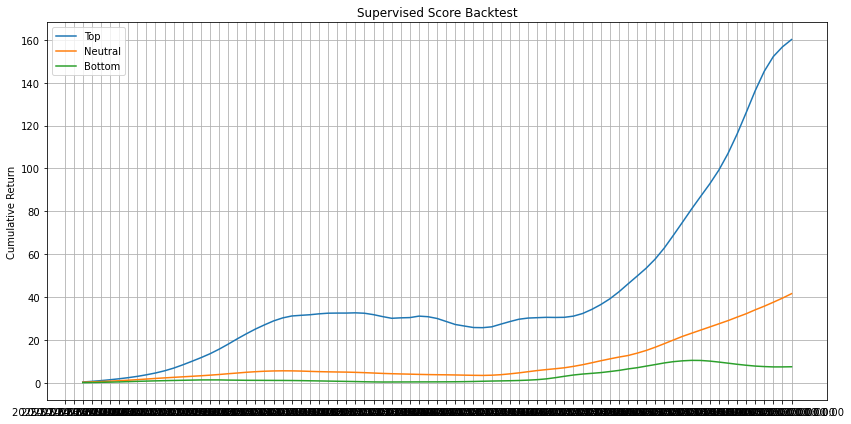

strategy,Bottom,Neutral,Top
Date,,,
2025-02-04 00:00:00,NaN,NaN,NaN
2025-02-05 00:00:00,NaN,NaN,NaN
2025-02-06 00:00:00,0.119135,0.313543,0.431037
2025-02-07 00:00:00,0.187042,0.476568,0.714759
2025-02-10 00:00:00,0.265217,0.635529,1.063262
...,...,...,...
2025-05-21 00:00:00,7.845101,34.076612,136.251555
2025-05-22 00:00:00,7.611875,35.773744,145.347751
2025-05-23 00:00:00,7.456980,37.626984,152.228088


In [5]:
ss = SupervisedScorer(start_date="2024-11-01")
df = ss.fit_predict()
ss.backtest(df)


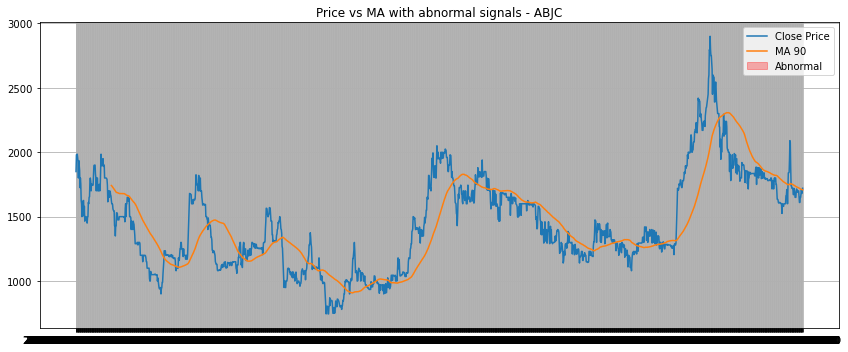

AttributeError: 'PriceDrivenStrategy' object has no attribute 'backtest_signal'

In [11]:
pds = PriceDrivenStrategy()
pds.plot_price_with_signal("ABJC")
pds.backtest_signal()

In [26]:
d1 = actions[actions["Ticker"] == "BNBC"]
#d1 = d1[d1["Date"] > "2022-01-01"].head(60)
d1[d1["Action"] == "buy"]

,Date,Ticker,Action,PriceToBuy,PriceToSell,ExpectedReturn,ReturnIfSelling
56525,2019-10-03 00:00:00,BNBC,buy,1200.0,885.0,-0.262500,NaN
56381,2019-10-09 00:00:00,BNBC,buy,1110.0,890.0,-0.198198,NaN
56345,2019-10-10 00:00:00,BNBC,buy,1030.0,890.0,-0.135922,NaN
56278,2019-10-14 00:00:00,BNBC,buy,1050.0,890.0,-0.152381,NaN
56241,2019-10-15 00:00:00,BNBC,buy,1030.0,880.0,-0.145631,NaN
56205,2019-10-16 00:00:00,BNBC,buy,1000.0,850.0,-0.150000,NaN
56171,2019-10-17 00:00:00,BNBC,buy,995.0,800.0,-0.195980,NaN
56135,2019-10-18 00:00:00,BNBC,buy,995.0,750.0,-0.246231,NaN
56100,2019-10-21 00:00:00,BNBC,buy,945.0,750.0,-0.206349,NaN
56064,2019-10-22 00:00:00,BNBC,buy,945.0,750.0,-0.206349,NaN


In [52]:
pds = PriceDrivenStrategy()
result = pds.forward_strategy()

In [63]:
!pip uninstall backports
!pip uninstall backports.tarfile
!pip install backports.tarfile

In [135]:
pds = PriceDrivenStrategy()
df_signal = pds.average_vs_current_signal(window=1260)
display(df_signal)

,Date,HistoricalAverage,CurrentPrice,GapPct,Action
Ticker,,,,,
ABJC,2025-07-07,1481,1690,14.00%,keep
BICB,2025-07-07,5424,5200,-4.00%,keep
BICC,2025-07-07,7518,16500,119.00%,sell
BNBC,2025-07-07,1419,1400,-1.00%,keep
BOAB,2025-07-07,5239,4410,-16.00%,buy
BOABF,2025-07-07,2818,3400,21.00%,sell
BOAC,2025-07-07,2993,6000,100.00%,sell
BOAM,2025-07-07,1144,3095,171.00%,sell
BOAN,2025-07-07,3099,2540,-18.00%,buy


In [60]:
pds = PriceDrivenStrategy()

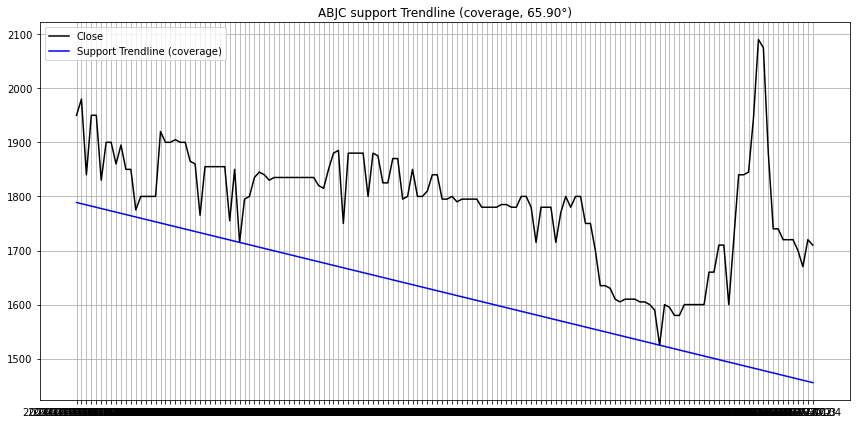

In [61]:
pds.plot_trendlines("ABJC", kind="support", max_angle_deg=62, graph_type="close", method="coverage")

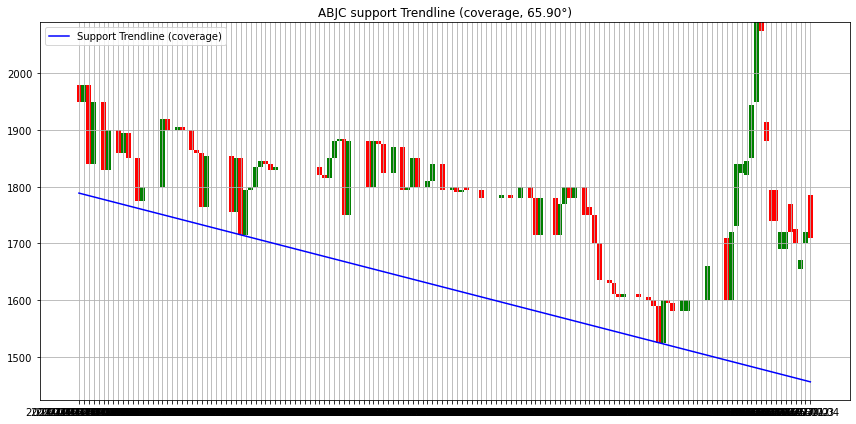

In [62]:
pds.plot_trendlines("ABJC", kind="support", max_angle_deg=62, graph_type="open-close", method="coverage")

In [106]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from DataBase.DBUtilities import BRVMDatabase
from sklearn.linear_model import LinearRegression
import math


class PriceDrivenStrategy:
    def __init__(self):
        self.database = BRVMDatabase("KAN.db")
        self.df = self._prepare()

    def _prepare(self, start_date="2018-01-01"):
        df = self.database.get_prices(start_date=start_date)
        df = self.database.dp.reset_df_index(df)
        df = df.sort_values(['Date', 'Ticker'])
        df['MA_90'] = df.groupby('Ticker')['Close'].transform(lambda x: x.rolling(90).mean())
        df['Deviation'] = (df['Close'] - df['MA_90']) / df['MA_90']
        df['Trend'] = df.groupby('Ticker')['Close'].transform(lambda x: x.diff().apply(np.sign))
        df['Trend_Streak'] = df.groupby('Ticker')['Trend'].transform(lambda x: x.groupby((x != x.shift()).cumsum()).cumcount() + 1)
        df['Abnormal'] = (df['Deviation'].abs() > 0.3)
        return df

    def plot_price_with_signal(self, ticker):
        data = self.df[self.df['Ticker'] == ticker]
        plt.figure(figsize=(12, 5))
        plt.plot(data['Date'], data['Close'], label="Close Price")
        plt.plot(data['Date'], data['MA_90'], label="MA 90")
        plt.fill_between(data['Date'], data['Close'], data['MA_90'], 
                         where=(data['Abnormal']), color='red', alpha=0.3, label="Abnormal")
        plt.title(f"Price vs MA with abnormal signals - {ticker}")
        plt.legend()
        plt.grid()
        plt.tight_layout()
        plt.show()

    def get_signals_summary(self):
        summary = self.df.groupby('Ticker').agg({
            'Deviation': ['mean', 'std'],
            'Trend_Streak': 'max',
            'Abnormal': 'sum'
        })
        return summary

    def forward_strategy(self, threshold=0.3, forward_days=21, backtest_window=60):
        df = self.df.copy()
        split_date = df['Date'].unique()[-backtest_window]
        train_df = df[df['Date'] < split_date].copy()
        test_df = df[df['Date'] == split_date].copy()

        train_df['Signal'] = (train_df['Deviation'] < -threshold).astype(int)
        last_signals = train_df.groupby('Ticker').apply(lambda x: x.loc[x['Signal'] == 1].sort_values('Date').tail(1)).reset_index(drop=True)

        test_df = test_df.merge(last_signals[['Ticker', 'Date']], on='Ticker', how='left', suffixes=('', '_lastsignal'))
        test_df['Action'] = 'keep'
        test_df.loc[test_df['Date'] == test_df['Date_lastsignal'], 'Action'] = 'buy'

        test_df['PriceToBuy'] = test_df['Close']
        test_df['PriceToSell'] = self.df[self.df['Date'] == self.df['Date'].unique()[-backtest_window + forward_days]].set_index('Ticker')['Close']
        test_df['PriceToSell'] = test_df['PriceToSell'].reindex(test_df['Ticker'].values).fillna(test_df['PriceToBuy']).values

        test_df['ExpectedReturn'] = (test_df['PriceToSell'] - test_df['PriceToBuy']) / test_df['PriceToBuy']
        test_df['Return'] = 0.0
        test_df.loc[test_df['Action'] == 'buy', 'Return'] = test_df['ExpectedReturn']

        return test_df[['Date', 'Ticker', 'Action', 'PriceToBuy', 'PriceToSell', 'Return']].sort_values(['Date', 'Ticker'])

    def rolling_forward_strategy(self, threshold=0.3, forward_days=21, backtest_window=60, step=5):
        df = self.df.copy()
        df = df.sort_values(['Date', 'Ticker'])
        dates = sorted(df['Date'].unique())
        results = []

        for i in range(backtest_window, len(dates) - forward_days, step):
            split_date = dates[i]
            train_df = df[df['Date'] < split_date].copy()
            test_df = df[df['Date'] == split_date].copy()

            train_df['Signal'] = (train_df['Deviation'] < -threshold).astype(int)
            last_signals = train_df.groupby('Ticker').apply(lambda x: x.loc[x['Signal'] == 1].sort_values('Date').tail(1)).reset_index(drop=True)

            test_df = test_df.merge(last_signals[['Ticker', 'Date']], on='Ticker', how='left', suffixes=('', '_lastsignal'))
            test_df['Action'] = 'keep'
            test_df.loc[test_df['Date'] == test_df['Date_lastsignal'], 'Action'] = 'buy'

            test_df['PriceToBuy'] = test_df['Close']
            price_to_sell = df[df['Date'] == dates[i + forward_days]].set_index('Ticker')['Close']
            test_df['PriceToSell'] = price_to_sell.reindex(test_df['Ticker'].values).fillna(test_df['PriceToBuy']).values

            test_df['ExpectedReturn'] = (test_df['PriceToSell'] - test_df['PriceToBuy']) / test_df['PriceToBuy']
            test_df['Return'] = 0.0
            test_df.loc[test_df['Action'] == 'buy', 'Return'] = test_df['ExpectedReturn']

            selected = test_df[['Date', 'Ticker', 'Action', 'PriceToBuy', 'PriceToSell', 'Return']]
            results.append(selected)

        return pd.concat(results).sort_values(['Date', 'Ticker'])
    
    
    def average_vs_current_signal(self, window=90):
        df = self.df.copy()
        df = df.sort_values(['Date'])
        latest_date = df['Date'].max()
        current_df = df[df['Date'] == latest_date].copy()
        mean_df = df.groupby('Ticker').apply(lambda x: x.tail(window)['Close'].mean()).reset_index()
        mean_df.columns = ['Ticker', 'HistoricalAverage']

        merged = current_df[['Ticker', 'Close']].merge(mean_df, on='Ticker')
        merged = merged.sort_values(by="Ticker")
        merged = merged.set_index('Ticker')
        merged.rename(columns={'Close': 'CurrentPrice'}, inplace=True)
        merged['Date'] = latest_date
        merged['Action'] = 'keep'
        merged.loc[merged['CurrentPrice'] < merged['HistoricalAverage'] * 0.9, 'Action'] = 'buy'
        merged.loc[merged['CurrentPrice'] > merged['HistoricalAverage'] * 1.15, 'Action'] = 'sell'
        merged['GapPct'] = (merged['CurrentPrice'] - merged['HistoricalAverage']) / merged['HistoricalAverage']
        merged['HistoricalAverage'] = merged['HistoricalAverage'].round(0)
        merged['CurrentPrice'] = merged['CurrentPrice'].round(0)
        merged['GapPct'] = merged['GapPct'].round(2)
        def color_action(val):
            if val == 'buy':
                return 'background-color: lightgreen'
            elif val == 'sell':
                return 'background-color: salmon'
            else:
                return 'background-color: lightgray'

        #styled = merged[['Date', 'HistoricalAverage', 'CurrentPrice', 'GapPct', 'Action']].style.applymap(color_action, subset=['Action'])
        styled = merged[['Date', 'HistoricalAverage', 'CurrentPrice', 'GapPct', 'Action']].style \
                        .applymap(color_action, subset=['Action']) \
                        .format({"HistoricalAverage": "{:.0f}", "CurrentPrice": "{:.0f}", "GapPct": "{:.2%}"})

        return styled
    

    def _trendline_coverage(self, x_fit, y_fit, x, y, kind, tolerance=0):
        best_score = -1
        best_line = None
        n = len(x_fit)
        for i in range(n):
            for j in range(i + 1, n):
                xi, xj = x_fit[i], x_fit[j]
                yi, yj = y_fit[i], y_fit[j]
                if xi == xj:
                    continue
                slope = (yj - yi) / (xj - xi)
                intercept = yi - slope * xi
                line = slope * x + intercept
                if kind == 'support':
                    mask = y >= line - tolerance
                else:
                    mask = y <= line + tolerance
                score = np.sum(mask)
                span = abs(xj - xi)
                total_score = score + span / len(x)  # Favor lines covering more length
                if total_score > best_score:
                    best_score = total_score
                    best_line = (slope, intercept)
        return best_line
    
    def plot_trendlines(self, ticker, window=150, kind='support', max_angle_deg=45, graph_type='open-close', method='regression'):
        """
        Plots trendlines for a given ticker with customizable price visualization.

        Parameters:
        - ticker (str): the stock symbol to plot
        - window (int): number of recent days to use for analysis
        - kind (str): 'support' or 'resistance'
        - max_angle_deg (float): maximum allowed angle (in degrees) for the trendline
        - graph_type (str): controls how the price is plotted:
            - 'open-close': bar chart from open to close (default)
            - 'close': line plot using closing prices
            - 'open': line plot using opening prices
            - 'mid': line plot using average of open and close

        - method:
            - 'regression': standard linear regression
            - 'strict': line under/above all prices from extrema
            - 'pairwise': test all pairs and retain valid
            - 'envelope': convex hull lower/upper line
            - 'ruler': heuristic top/bottom extremes
        """
        df = self.df[self.df['Ticker'] == ticker].tail(window).reset_index(drop=True)
        x = np.arange(len(df))
        y = df['Close'].values

        if kind == 'support':
            idx = y <= pd.Series(y).rolling(5, center=True).min()
        else:
            idx = y >= pd.Series(y).rolling(5, center=True).max()

        x_fit = x[idx]
        y_fit = y[idx]

        if len(x_fit) < 2:
            print("Fallback: not enough extrema. Using absolute values.")
            idx = np.argsort(y)[:2] if kind == 'support' else np.argsort(y)[-2:]
            x_fit, y_fit = x[idx], y[idx]

        trendline = None
        angle_deg = None

        if method == 'regression':
            model = LinearRegression().fit(x_fit.reshape(-1, 1), y_fit)
            slope = model.coef_[0]
            intercept = model.intercept_
            angle_deg = abs(math.degrees(math.atan(slope)))
            if angle_deg > max_angle_deg:
                print(f"Rejected: angle {angle_deg:.2f}° > {max_angle_deg}°")
                return
            trendline = model.predict(x.reshape(-1, 1))

        elif method == 'strict' or method == 'pairwise':
            best = None
            for i in range(len(x_fit)):
                for j in range(i + 1, len(x_fit)):
                    xi, xj = x_fit[i], x_fit[j]
                    yi, yj = y_fit[i], y_fit[j]
                    if xi == xj: continue
                    slope = (yj - yi) / (xj - xi)
                    intercept = yi - slope * xi
                    line = slope * x + intercept
                    if kind == 'support' and np.all(y >= line):
                        if not best or intercept > best[1]:
                            best = (slope, intercept)
                    elif kind == 'resistance' and np.all(y <= line):
                        if not best or intercept < best[1]:
                            best = (slope, intercept)
            if not best:
                print("No valid strict/pairwise trendline found.")
                return
            slope, intercept = best
            trendline = slope * x + intercept
            angle_deg = abs(math.degrees(math.atan(slope)))

        elif method == 'coverage':
            result = self._trendline_coverage(x_fit, y_fit, x, y, kind, tolerance=0.5)
            if result is None:
                print("No coverage trendline found")
                return
            slope, intercept = result
            trendline = slope * x + intercept
            angle_deg = abs(math.degrees(math.atan(slope)))

        elif method == 'envelope':
            points = np.column_stack((x, y))
            try:
                hull = ConvexHull(points)
                edges = []
                for i in range(len(hull.vertices)):
                    a = hull.vertices[i - 1]
                    b = hull.vertices[i]
                    xa, ya = x[a], y[a]
                    xb, yb = x[b], y[b]
                    if xb == xa: continue
                    slope = (yb - ya) / (xb - xa)
                    intercept = ya - slope * xa
                    edge_line = slope * x + intercept
                    if kind == 'support' and np.all(y >= edge_line):
                        edges.append((slope, intercept))
                    elif kind == 'resistance' and np.all(y <= edge_line):
                        edges.append((slope, intercept))
                if not edges:
                    print("No valid envelope edge found.")
                    return
                slope, intercept = max(edges, key=lambda e: e[1]) if kind == 'support' else min(edges, key=lambda e: e[1])
                trendline = slope * x + intercept
                angle_deg = abs(math.degrees(math.atan(slope)))
            except:
                print("Convex hull failed")
                return

        elif method == 'ruler':
            idx_min = np.argmin(y)
            idx_max = np.argmax(y)
            if kind == 'support':
                slope = (y[idx_max] - y[idx_min]) / (idx_max - idx_min + 1e-5)
                intercept = y[idx_min] - slope * idx_min
            else:
                slope = (y[idx_min] - y[idx_max]) / (idx_min - idx_max + 1e-5)
                intercept = y[idx_max] - slope * idx_max
            trendline = slope * x + intercept
            angle_deg = abs(math.degrees(math.atan(slope)))

        else:
            print("Invalid method")
            return

        breaks = []
        self.last_breaks = []
        if kind == 'support':
            breaks = np.where(y < trendline)[0]
        else:
            breaks = np.where(y > trendline)[0]

        fig, ax = plt.subplots(figsize=(12, 6))
        if graph_type == 'open-close':
            ax.bar(df['Date'], df['Close'] - df['Open'], bottom=df['Open'], width=1,
                   color=(df['Close'] >= df['Open']).map({True: 'green', False: 'red'}))
        elif graph_type == 'close':
            ax.plot(df['Date'], df['Close'], label='Close', color='black')
        elif graph_type == 'open':
            ax.plot(df['Date'], df['Open'], label='Open', color='gray')
        elif graph_type == 'mid':
            ax.plot(df['Date'], (df['Open'] + df['Close']) / 2, label='Mid', color='purple')
        else:
            print("Invalid graph_type")
            return

        ax.plot(df['Date'], trendline, label=f"{kind.capitalize()} Trendline ({method})", color='blue')
        for b in breaks:
            ax.annotate('Break', xy=(df['Date'][b], y[b]), xytext=(0, -12), textcoords='offset points',
                        ha='center', color='red', fontsize=8,
                        arrowprops=dict(arrowstyle='->', color='red'))
            self.last_breaks.append({"date": df['Date'][b], "price": y[b]})

        ax.set_title(f"{ticker} {kind} Trendline ({method}, {angle_deg:.2f}°)")
        ax.legend()
        plt.grid()
        plt.tight_layout()
        plt.show()
        
        
    def generate_trade_signals(self, ticker, window=150, kind='support', method='coverage'):
        self.plot_trendlines(ticker, window=window, kind=kind, method=method)
        if not hasattr(self, 'last_breaks') or not self.last_breaks:
            return pd.DataFrame()
        df = self.df[self.df['Ticker'] == ticker].tail(window).reset_index(drop=True)
        df = df.sort_values('Date')

        signal_df = pd.DataFrame(self.last_breaks)
        signal_df['Ticker'] = ticker
        signal_df['Volume'] = signal_df['date'].map(lambda d: df[df['Date'] == d]['Volume'].values[0] if d in df['Date'].values else np.nan)
        signal_df['Volume_z'] = signal_df['date'].map(lambda d: df[df['Date'] == d]['Volume_zscore'].values[0] if d in df['Date'].values else np.nan)

        signal_df['ReturnIfExecuted'] = df.set_index('Date').reindex(signal_df['date'])['Close'].pct_change().shift(-1).values
        signal_df.rename(columns={"date": "Date", "price": "Close"}, inplace=True)
        signal_df['Action'] = 'Sell' if kind == 'support' else 'Buy'
        signal_df['Break_Confirmed'] = signal_df['Volume_z'] > 0
        signal_df['Time_Near_Level'] = signal_df['Date'].map(lambda d: self._compute_time_near_level(df, d, kind))
        return signal_df[['Date', 'Ticker', 'Close', 'Volume', 'Volume_z', 'Time_Near_Level', 'Action', 'Break_Confirmed', 'ReturnIfExecuted']]

    def _compute_time_near_level(self, df, date, kind, window=10, threshold=0.01):
        date_index = df[df['Date'] == date].index
        if date_index.empty or date_index[0] < window:
            return 0
        i = date_index[0]
        ref_price = df['Close'].iloc[i]
        recent = df.iloc[i - window:i]
        count = (abs(recent['Close'] - ref_price) / ref_price < threshold).sum()
        return int(count)
    
    def identify_zones(self, ticker, window=200, freq_thresh=3, tolerance=0.01):
        df = self.df[self.df['Ticker'] == ticker].tail(window)
        levels = df['Close'].round(1)  # bucketize levels
        zone_counts = levels.value_counts()
        zone_candidates = zone_counts[zone_counts >= freq_thresh].index

        zone_df = pd.DataFrame({'Zone': zone_candidates})
        current_price = df['Close'].iloc[-1]
        zone_df['CurrentPrice'] = current_price
        zone_df['GapPct'] = (current_price - zone_df['Zone']) / zone_df['Zone']

        def classify(gap):
            if abs(gap) <= tolerance:
                return 'ATTENTION'
            elif gap > 0:
                return 'ABOVE'
            else:
                return 'BELOW'

        zone_df['Zone_Status'] = zone_df['GapPct'].apply(classify)
        zone_df = zone_df.sort_values('GapPct')
        return zone_df.reset_index(drop=True)
    
    def anticipate_price_action(self, ticker, window=200, freq_thresh=3, tolerance=0.01):
        zones = self.identify_zones(ticker, window, freq_thresh, tolerance)
        if zones.empty:
            return "NO ZONE"

        zone = zones[zones['Zone_Status'] == 'ATTENTION']
        if zone.empty:
            return "WAIT"

        recent = self.df[self.df['Ticker'] == ticker].tail(window).copy()
        if 'Volume_zscore' not in recent.columns:
            recent['Volume_zscore'] = recent.groupby('Ticker')['Volume'].transform(lambda x: (x - x.mean()) / x.std())

        latest_volume_z = recent['Volume_zscore'].iloc[-1]
        latest_price = recent['Close'].iloc[-1]
        trend = recent['Trend'].iloc[-1]

        if latest_volume_z > 0 and trend > 0:
            return f"BUY: near zone {zone['Zone'].values[0]} with confirming volume"
        elif latest_volume_z > 0 and trend < 0:
            return f"SELL: near zone {zone['Zone'].values[0]} with rejecting volume"
        else:
            return f"OBSERVE: near zone {zone['Zone'].values[0]} with weak volume"
        
    def anticipate_all(self, window=200, freq_thresh=3, tolerance=0.01):
        tickers = self.df['Ticker'].unique()
        results = []
        for ticker in tickers:
            decision = self.anticipate_price_action(ticker, window, freq_thresh, tolerance)
            results.append({"Ticker": ticker, "Signal": decision})
        df = pd.DataFrame(results)
        df['SignalType'] = df['Signal'].apply(lambda x: x.split(':')[0] if ':' in x else x)
        return df.sort_values('SignalType')

# Usage:
# pds = PriceDrivenStrategy()
# forward_result = pds.forward_strategy()
# rolling_result = pds.rolling_forward_strategy()
# print(rolling_result.head())


In [107]:
#pds = PriceDrivenStrategy()
#df = pds.generate_trade_signals("ABJC")

In [108]:
#pds.identify_zones("ABJC")

In [109]:
pds = PriceDrivenStrategy()

In [110]:
pds.anticipate_price_action("ABJC")

'OBSERVE: near zone 1720.0 with weak volume'

In [111]:
pds.anticipate_price_action("BNBC")

'WAIT'

In [112]:
pds.anticipate_price_action("STAC")

'OBSERVE: near zone 565.0 with weak volume'

In [113]:
pds.anticipate_all()

,Ticker,Signal,SignalType
10,CBIBF,BUY: near zone 10500.0 with confirming volume,BUY
26,SIBC,BUY: near zone 4900.0 with confirming volume,BUY
6,BOAM,BUY: near zone 3070.0 with confirming volume,BUY
7,BOAN,BUY: near zone 2400.0 with confirming volume,BUY
24,SGBC,OBSERVE: near zone 25000.0 with weak volume,OBSERVE
25,SHEC,OBSERVE: near zone 1075.0 with weak volume,OBSERVE
27,SICC,OBSERVE: near zone 3560.0 with weak volume,OBSERVE
28,SIVC,OBSERVE: near zone 535.0 with weak volume,OBSERVE
29,SMBC,OBSERVE: near zone 9135.0 with weak volume,OBSERVE
30,SNTS,OBSERVE: near zone 25950.0 with weak volume,OBSERVE


In [128]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from DataBase.DBUtilities import BRVMDatabase

class PriceActionStrategy:
    def __init__(self):
        self.database = BRVMDatabase("KAN.db")
        self.df = self._prepare()

    def _prepare(self, start_date="2015-01-01"):
        df = self.database.get_prices(start_date=start_date)
        df = self.database.dp.reset_df_index(df)
        df = df.sort_values(['Date', 'Ticker'])
        df['Body'] = (df['Close'] - df['Open']).abs()
        df['Range'] = (df['High'] - df['Low']).abs()
        df['WickTop'] = df['High'] - df[['Close', 'Open']].max(axis=1)
        df['WickBot'] = df[['Close', 'Open']].min(axis=1) - df['Low']
        df['Volume_z'] = df.groupby('Ticker')['Volume'].transform(lambda x: (x - x.mean()) / x.std())
        return df

    def detect_price_action(self, ticker, window=15, wick_threshold=0.6, body_threshold=0.3):
        df = self.df[self.df['Ticker'] == ticker].copy().tail(window)
        last = df.iloc[-1]

        wick_top_ratio = last['WickTop'] / last['Range'] if last['Range'] != 0 else 0
        wick_bot_ratio = last['WickBot'] / last['Range'] if last['Range'] != 0 else 0
        body_ratio = last['Body'] / last['Range'] if last['Range'] != 0 else 0

        if body_ratio < body_threshold:
            if wick_bot_ratio > wick_threshold and last['Volume_z'] > 0:
                return f"BUY: rejection from below with wick={wick_bot_ratio:.2f}"
            elif wick_top_ratio > wick_threshold and last['Volume_z'] > 0:
                return f"SELL: rejection from above with wick={wick_top_ratio:.2f}"
            else:
                return "OBSERVE: low conviction candle"
        else:
            return "WAIT: no clear rejection"

    def scan_market(self, window=15):
        tickers = self.df['Ticker'].unique()
        decisions = []
        for ticker in tickers:
            signal = self.detect_price_action(ticker, window)
            decisions.append({"Ticker": ticker, "Signal": signal})
        return pd.DataFrame(decisions)
    
    def plot_recent_candles(self, ticker, window=15):
        df = self.df[self.df['Ticker'] == ticker].copy().tail(window).reset_index(drop=True)
        plt.figure(figsize=(10, 5))
        for i in range(len(df)):
            c = 'green' if df['Close'][i] >= df['Open'][i] else 'red'
            plt.plot([i, i], [df['Low'][i], df['High'][i]], color='black')
            plt.plot([i, i], [df['Open'][i], df['Close'][i]], color=c, linewidth=5)
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        plt.xticks(range(len(df)), df['Date'].dt.strftime("%Y-%m-%d"), rotation=90)
        plt.title(f"Candlestick Plot: {ticker} (last {window} days)")
        plt.tight_layout()
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()
        
    def anticipate_all(self, window=200, freq_thresh=3, tolerance=0.01):
        tickers = self.df['Ticker'].unique()
        results = []
        for ticker in tickers:
            decision = self.detect_price_action(ticker, window, freq_thresh, tolerance)
            results.append({"Ticker": ticker, "Signal": decision})
        df = pd.DataFrame(results)
        df['SignalType'] = df['Signal'].apply(lambda x: x.split(':')[0] if ':' in x else x)
        return df.sort_values('SignalType')



In [129]:
pas = PriceActionStrategy()
pas.scan_market()  # signaux pour tout le marché
pas.detect_price_action("BNBC")  # analyse pour un titre

'WAIT: no clear rejection'

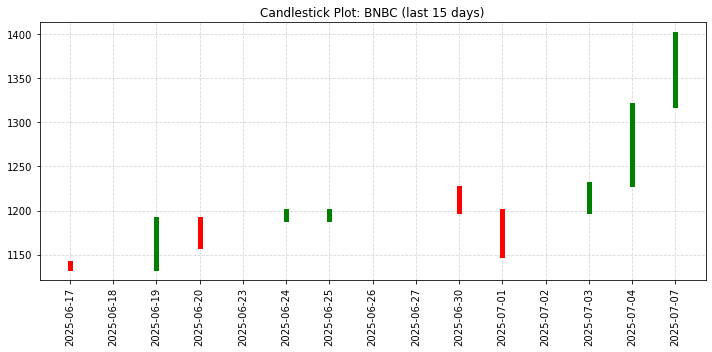

In [130]:
pas.plot_recent_candles("BNBC")

In [131]:
pas.anticipate_all()

,Ticker,Signal,SignalType
12,SIVC,OBSERVE: low conviction candle,OBSERVE
23,UNXC,OBSERVE: low conviction candle,OBSERVE
27,STBC,OBSERVE: low conviction candle,OBSERVE
29,NTLC,OBSERVE: low conviction candle,OBSERVE
16,UNLC,OBSERVE: low conviction candle,OBSERVE
11,SICC,OBSERVE: low conviction candle,OBSERVE
8,PALC,OBSERVE: low conviction candle,OBSERVE
25,CABC,OBSERVE: low conviction candle,OBSERVE
39,SCRC,OBSERVE: low conviction candle,OBSERVE
5,ETIT,OBSERVE: low conviction candle,OBSERVE


In [65]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from DataBase.DBUtilities import BRVMDatabase

class PriceDrivenStrategy:
    def __init__(self, start_date):
        self.database = BRVMDatabase("KAN.db")
        self.start_date = start_date
        self.df = self._prepare(start_date)

    def _prepare(self, start_date="2018-01-01"):
        df = self.database.get_prices(start_date=start_date)
        df = self.database.dp.reset_df_index(df)
        df = df.sort_values(['Ticker', 'Date'])
        df['MA_90'] = df.groupby('Ticker')['Close'].transform(lambda x: x.rolling(90).mean())
        df['Deviation'] = (df['Close'] - df['MA_90']) / df['MA_90']
        df['Trend'] = df.groupby('Ticker')['Close'].transform(lambda x: x.diff().apply(np.sign))
        df['Trend_Streak'] = df.groupby('Ticker')['Trend'].transform(lambda x: x.groupby((x != x.shift()).cumsum()).cumcount() + 1)
        df['Abnormal'] = (df['Deviation'].abs() > 0.3)
        return df

    def plot_price_with_signal(self, ticker):
        data = self.df[self.df['Ticker'] == ticker]
        plt.figure(figsize=(12, 5))
        plt.plot(data['Date'], data['Close'], label="Close Price")
        plt.plot(data['Date'], data['MA_90'], label="MA 90")
        plt.fill_between(data['Date'], data['Close'], data['MA_90'], 
                         where=(data['Abnormal']), color='red', alpha=0.3, label="Abnormal")
        plt.title(f"Price vs MA with abnormal signals - {ticker}")
        plt.legend()
        plt.grid()
        plt.tight_layout()
        plt.show()

    def get_signals_summary(self):
        summary = self.df.groupby('Ticker').agg({
            'Deviation': ['mean', 'std'],
            'Trend_Streak': 'max',
            'Abnormal': 'sum'
        })
        return summary

    def backtest_signal(self, threshold=0.3, forward_days=21, return_signals=False):
        df = self.df.copy()
        df['Signal'] = (df['Deviation'] < -threshold).astype(int)
        df['SellDate'] = df.groupby('Ticker')['Date'].shift(-forward_days)
        df['PriceToSell'] = df.groupby('Ticker')['Close'].shift(-forward_days)
        df['PriceToBuy'] = df['Close']

        df['ForwardReturn'] = df.groupby('Ticker')['Close'].transform(
            lambda x: x.pct_change(periods=forward_days).shift(-forward_days)
        )
        df = df.dropna(subset=['ForwardReturn'])
        df['SignalReturn'] = df['Signal'] * df['ForwardReturn']

        performance = df.groupby('Date')['SignalReturn'].mean().dropna()
        cumulative = (1 + performance).cumprod() - 1

        plt.figure(figsize=(12, 5))
        plt.plot(cumulative.index, cumulative.values, label="Signal Strategy")
        plt.title("Backtest: Undervaluation Signal Return")
        plt.grid()
        plt.ylabel("Cumulative Return")
        plt.tight_layout()
        plt.legend()
        plt.show()

        if return_signals:
            df['Action'] = 'keep'
            df.loc[df['Signal'] == 1, 'Action'] = 'buy'
            df['SellFlag'] = df.groupby('Ticker')['Action'].shift(forward_days)
            df.loc[df['SellFlag'] == 'buy', 'Action'] = 'sell'

            df['ExpectedReturn'] = df['ForwardReturn'].where(df['Action'] == 'buy')
            df['ReturnIfSelling'] = df['ForwardReturn'].where(df['Action'] == 'sell')

            actions = df[['Date', 'Ticker', 'Action', 'PriceToBuy', 'PriceToSell', 'ExpectedReturn', 'ReturnIfSelling']]
            return cumulative, actions.sort_values(['Date', 'Ticker'])

        return cumulative

# Usage:
# pds = PriceDrivenStrategy()
# pds.plot_price_with_signal('ABJC')
# print(pds.get_signals_summary())
# cumulative, actions = pds.backtest_signal(return_signals=True)
# print(actions.head())


In [25]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from DataBase.DBUtilities import BRVMDatabase

class FactorAnalytics:
    def __init__(self, n_components=3, start_date="2018-01-01"):
        self.n_components = n_components
        self.feature_names = None
        self.scaler = None
        self.pca_model = None
        self.pca_df = None
        self.start_date = start_date
        self.database = BRVMDatabase("KAN.db")

    def build_features(self, start_date=None):
        start_date = self.start_date if start_date is None else start_date
        price_df = self.database.get_prices(start_date=start_date)
        fundamental_df = self.database.get_fundamentals()
        market_cap_df = self.database.get_market_cap()

        fundamental_df = self.database.dp.clean_and_convert(
            fundamental_df.drop(columns=["Ticker", "Volume"]), fillna=True
        )
        price_df = self.database.dp.reset_df_index(price_df)

        fund_mcap = fundamental_df.merge(market_cap_df, on=['Date', 'Ticker'], how='left')
        df = price_df.merge(fund_mcap, on=['Date', 'Ticker'], how='left')
        df = df.groupby('Ticker', group_keys=False).apply(lambda x: x.ffill().bfill()).fillna(0.0)
        df = df.sort_values(['Ticker', 'Date'])

        df['Momentum_1M'] = df.groupby('Ticker')['Close'].pct_change(21)
        df['Momentum_3M'] = df.groupby('Ticker')['Close'].pct_change(63)
        df['Volatility_1W'] = df.groupby('Ticker')['Close'].transform(lambda x: x.pct_change().rolling(5).std())
        df['Volatility_1M'] = df.groupby('Ticker')['Close'].transform(lambda x: x.pct_change().rolling(21).std())
        df['Volume_5d'] = df.groupby('Ticker')['Volume'].transform(lambda x: x.rolling(5).mean())
        df['RelativePrice_1M'] = df.groupby('Ticker')['Close'].transform(lambda x: x / x.rolling(30).mean())

        df['Ret_1M_fwd'] = df.groupby('Ticker')['Close'].pct_change(periods=21).shift(-21)
        df['Ret_3M_fwd'] = df.groupby('Ticker')['Close'].pct_change(periods=63).shift(-63)
        df['Ret_1M_fwd'] = df['Ret_1M_fwd'].clip(-1, 1)

        self.feature_names = [
            'Momentum_1M', 'Momentum_3M', 'Volatility_1W', 'Volatility_1M',
            'Volume_5d', 'RelativePrice_1M', 'PER', 'Yield', 'floting_cap'
        ]

        return df.reset_index(drop=True)

    def run_pca(self, df):
        features_df = df.set_index(['Date', 'Ticker'])[self.feature_names]
        features_df = self.database.dp.impute_missing(features_df, method="mean").dropna()

        self.scaler = StandardScaler()
        X_scaled = self.scaler.fit_transform(features_df)
        self.pca_model = PCA(n_components=self.n_components)
        components = self.pca_model.fit_transform(X_scaled)

        pca_df = pd.DataFrame(components, columns=[f'PC{i+1}' for i in range(self.n_components)])
        pca_df[['Date', 'Ticker']] = features_df.reset_index()[['Date', 'Ticker']]
        pca_df['Ret_1M_fwd'] = df.set_index(['Date', 'Ticker']).loc[features_df.index, 'Ret_1M_fwd'].values
        self.pca_df = pca_df
        return pca_df

    def rolling_pca(self, df, window_days=252):
        results = []
        df = df.sort_values("Date")
        unique_dates = df['Date'].drop_duplicates().sort_values()

        for i in range(window_days, len(unique_dates)):
            window_start = unique_dates.iloc[i - window_days]
            window_end = unique_dates.iloc[i]
            window_df = df[(df['Date'] >= window_start) & (df['Date'] <= window_end)].copy()

            try:
                pca_result = self.run_pca(window_df)
                pca_result["Window_End"] = window_end
                results.append(pca_result)
            except Exception as e:
                print(f"Skipping window ending {window_end}: {e}")

        self.rolling_pca_df = pd.concat(results).reset_index(drop=True) if results else pd.DataFrame()
        return self.rolling_pca_df

    def compute_pca_score(self, method="auto", weights=None):
        rolling_scores = []

        for date, group in self.rolling_pca_df.groupby("Window_End"):
            # calcul de score par composantes pondérées
            corr = [group[[f'PC{i+1}', 'Ret_1M_fwd']].corr().iloc[0, 1] for i in range(fa.n_components)]
            corr = [c if pd.notna(c) else 0 for c in corr]
            group["Rolling_PCA_Score"] = sum(group[f"PC{i+1}"] * corr[i] for i in range(fa.n_components))
            rolling_scores.append(group)

        self.pca_scored_df = pd.concat(rolling_scores)
        return self.pca_scored_df

    def compute_supervised_score(self, df):
        features_df = df.set_index(['Date', 'Ticker'])[self.feature_names]
        features_df = self.database.dp.impute_missing(features_df, method="mean").dropna()
        df = df.set_index(['Date', 'Ticker']).loc[features_df.index]

        X = features_df.values
        y = df['Ret_1M_fwd'].clip(-1, 1).values

        model = LinearRegression()
        model.fit(X, y)
        df['Supervised_Score'] = model.predict(X)
        return df.reset_index()

    def check_sample_size(self):
        if self.pca_df is None:
            print("PCA not yet computed.")
            return
        n_obs = len(self.pca_df)
        n_features = len(self.feature_names)
        print(f"Sample size: {n_obs} rows for {n_features} features → ratio = {n_obs / n_features:.2f}")
        if n_obs < 5 * n_features:
            print("⚠️ Attention: faible profondeur d'échantillon pour une PCA fiable.")
        else:
            print("✅ Assez de données pour une PCA robuste.")

    def explained_variance(self):
        return self.pca_model.explained_variance_ratio_ if self.pca_model else None

    def get_completed_df(self, start_date="2018-01-01", how="inner"):
        df = self.build_features(start_date=start_date)
        self.run_pca(df)
        self.compute_pca_score()
        return df.merge(self.pca_df, on=["Date", "Ticker"], how=how)

    def do_factors_analysis(self, show=True):
        df = self.build_features()
        self.run_pca(df)
        self.compute_pca_score()
        if show:
            self.plot_pca_loadings()
            self.plot_pca_scatter()
        return self.pca_df

    def plot_pca_loadings(self):
        if not self.pca_model:
            return None
        loadings = pd.DataFrame(self.pca_model.components_.T,
                                columns=[f'PC{i+1}' for i in range(self.n_components)],
                                index=self.feature_names)
        plt.figure(figsize=(10, 5))
        sns.heatmap(loadings, annot=True, cmap="coolwarm")
        plt.title("PCA Loadings")
        plt.tight_layout()
        plt.show()
        return loadings

    def plot_pca_scatter(self, hue_col='PCA_Score'):
        if self.pca_df is None or 'PC1' not in self.pca_df.columns or 'PC2' not in self.pca_df.columns:
            return
        plt.figure(figsize=(10, 7))
        sns.scatterplot(
            data=self.pca_df, x='PC1', y='PC2', hue=hue_col,
            palette='coolwarm', edgecolor='k', alpha=0.8
        )
        plt.axhline(0, color='gray', linestyle='--')
        plt.axvline(0, color='gray', linestyle='--')
        plt.title("PCA Component Space: PC1 vs PC2")
        plt.tight_layout()
        plt.show()
        return
    
    
    def backtest_from_rolling(self, df: pd.DataFrame, score_column: str = "PCA_Score", quantile=0.3):
        if "Window_End" not in df.columns:
            raise ValueError("'Window_End' must be present in the DataFrame for rolling backtest.")

        df = df.copy()
        df = df.dropna(subset=[score_column, 'Ret_1M_fwd'])
        df['group'] = df.groupby('Window_End')[score_column].transform(
            lambda x: pd.qcut(x.rank(method="first"), q=[0, quantile, 1 - quantile, 1], labels=['Bottom', 'Neutral', 'Top'])
        )
        df['strategy'] = df['group'].astype(str)

        # Éliminer les dates où il n'y a pas assez de titres dans les groupes Top/Bottom
        counts = df.groupby(['Window_End', 'strategy']).size().unstack().fillna(0)
        valid_dates = counts[(counts['Top'] > 3) & (counts['Bottom'] > 3)].index
        df = df[df['Window_End'].isin(valid_dates)]

        # Calcul des performances et lissage
        perf = df.groupby(['Window_End', 'strategy'])['Ret_1M_fwd'].mean().unstack()
        perf = (1 + perf).cumprod() - 1
        perf = perf.rolling(3).mean()  # Lissage pour atténuer les pics isolés

        plt.figure(figsize=(12, 6))
        for col in ['Top', 'Neutral', 'Bottom']:
            if col in perf.columns:
                plt.plot(perf.index, perf[col], label=col)
        plt.title("Backtest Cumulative Returns by Group")
        plt.ylabel("Cumulative Return")
        plt.legend()
        plt.grid()
        plt.tight_layout()
        plt.show()

        return perf


In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from DataBase.DBUtilities import BRVMDatabase

class SupervisedScorer:
    def __init__(self, feature_names=None, start_date="2018-01-01"):
        self.start_date = start_date
        self.feature_names = feature_names
        self.model = LinearRegression()
        self.scaler = StandardScaler()
        self.database = BRVMDatabase("KAN.db")

    def build_features(self, start_date=None):
        start_date = self.start_date if start_date is None else start_date
        price_df = self.database.get_prices(start_date=start_date)
        fundamental_df = self.database.get_fundamentals()
        market_cap_df = self.database.get_market_cap()

        fundamental_df = self.database.dp.clean_and_convert(
            fundamental_df.drop(columns=["Ticker", "Volume"]), fillna=True
        )
        price_df = self.database.dp.reset_df_index(price_df)

        fund_mcap = fundamental_df.merge(market_cap_df, on=['Date', 'Ticker'], how='left')
        df = price_df.merge(fund_mcap, on=['Date', 'Ticker'], how='left')
        df = df.groupby('Ticker', group_keys=False).apply(lambda x: x.ffill().bfill()).fillna(0.0)
        df = df.sort_values(['Ticker', 'Date'])

        df['Momentum_1M'] = df.groupby('Ticker')['Close'].pct_change(21)
        df['Momentum_3M'] = df.groupby('Ticker')['Close'].pct_change(63)
        df['Volatility_1W'] = df.groupby('Ticker')['Close'].transform(lambda x: x.pct_change().rolling(5).std())
        df['Volatility_1M'] = df.groupby('Ticker')['Close'].transform(lambda x: x.pct_change().rolling(21).std())
        df['Volume_5d'] = df.groupby('Ticker')['Volume'].transform(lambda x: x.rolling(5).mean())
        df['RelativePrice_1M'] = df.groupby('Ticker')['Close'].transform(lambda x: x / x.rolling(30).mean())

        df['Ret_1M_fwd'] = df.groupby('Ticker')['Close'].pct_change(periods=21).shift(-21)
        df['Ret_1M_fwd'] = df['Ret_1M_fwd'].clip(-1, 1)

        self.feature_names = [
            'Momentum_1M', 'Momentum_3M', 'Volatility_1W', 'Volatility_1M',
            'Volume_5d', 'RelativePrice_1M', 'PER', 'Yield', 'floting_cap'
        ]

        return df.reset_index(drop=True)

    def fit_predict(self, df=None):
        if df is None:
            df = self.build_features()

        df = df.dropna(subset=self.feature_names + ['Ret_1M_fwd'])
        X = df[self.feature_names]
        y = df['Ret_1M_fwd'].clip(-1, 1)

        X_scaled = self.scaler.fit_transform(X)
        self.model.fit(X_scaled, y)
        df['Supervised_Score'] = self.model.predict(X_scaled)
        return df

    def backtest(self, df=None, quantile=0.3):
        if df is None:
            df = self.fit_predict()

        df = df.dropna(subset=['Supervised_Score', 'Ret_1M_fwd'])
        df = df.sort_values('Date')

        df['group'] = df.groupby('Date')['Supervised_Score'].transform(
            lambda x: pd.qcut(x.rank(method="first"), q=[0, quantile, 1 - quantile, 1], labels=['Bottom', 'Neutral', 'Top'])
        )
        df['strategy'] = df['group'].astype(str)

        perf = df.groupby(['Date', 'strategy'])['Ret_1M_fwd'].mean().unstack()
        perf = perf.clip(-0.25, 0.25)
        perf = (1 + perf).cumprod() - 1
        perf = perf.rolling(3).mean()

        plt.figure(figsize=(12, 6))
        for col in ['Top', 'Neutral', 'Bottom']:
            if col in perf.columns:
                plt.plot(perf.index, perf[col], label=col)
        plt.title("Supervised Score Backtest")
        plt.ylabel("Cumulative Return")
        plt.legend()
        plt.grid()
        plt.tight_layout()
        plt.show()

        return perf


In [35]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from DataBase.DBUtilities import BRVMDatabase

class SupervisedScorer:
    def __init__(self, feature_names=None, start_date="2018-01-01"):
        self.start_date = start_date
        self.feature_names = feature_names
        self.model = LinearRegression()
        self.scaler = StandardScaler()
        self.database = BRVMDatabase("KAN.db")

    def build_features(self, start_date=None):
        start_date = self.start_date if start_date is None else start_date
        price_df = self.database.get_prices(start_date=start_date)
        fundamental_df = self.database.get_fundamentals()
        market_cap_df = self.database.get_market_cap()

        fundamental_df = self.database.dp.clean_and_convert(
            fundamental_df.drop(columns=["Ticker", "Volume"]), fillna=True
        )
        price_df = self.database.dp.reset_df_index(price_df)

        fund_mcap = fundamental_df.merge(market_cap_df, on=['Date', 'Ticker'], how='left')
        df = price_df.merge(fund_mcap, on=['Date', 'Ticker'], how='left')
        df = df.groupby('Ticker', group_keys=False).apply(lambda x: x.ffill().bfill()).fillna(0.0)
        df = df.sort_values(['Ticker', 'Date'])

        df['Momentum_1M'] = df.groupby('Ticker')['Close'].pct_change(21)
        df['Momentum_3M'] = df.groupby('Ticker')['Close'].pct_change(63)
        df['Volatility_1W'] = df.groupby('Ticker')['Close'].transform(lambda x: x.pct_change().rolling(5).std())
        df['Volatility_1M'] = df.groupby('Ticker')['Close'].transform(lambda x: x.pct_change().rolling(21).std())
        df['Volume_5d'] = df.groupby('Ticker')['Volume'].transform(lambda x: x.rolling(5).mean())
        df['RelativePrice_1M'] = df.groupby('Ticker')['Close'].transform(lambda x: x / x.rolling(30).mean())

        df['Ret_1M_fwd'] = df.groupby('Ticker')['Close'].pct_change(periods=21).shift(-21)

        # Borne maximale théorique basée sur ±7% par jour pendant 21 jours
        max_up = (1 + 0.07) ** 21 - 1
        max_down = (1 - 0.07) ** 21 - 1
        df['Ret_1M_fwd'] = df['Ret_1M_fwd'].clip(lower=max_down, upper=max_up)

        self.feature_names = [
            'Momentum_1M', 'Momentum_3M', 'Volatility_1W', 'Volatility_1M',
            'Volume_5d', 'RelativePrice_1M', 'PER', 'Yield', 'floting_cap'
        ]

        return df.reset_index(drop=True)

    def fit_predict(self, df=None):
        if df is None:
            df = self.build_features()

        df = df.dropna(subset=self.feature_names + ['Ret_1M_fwd'])
        X = df[self.feature_names]
        y = df['Ret_1M_fwd']

        X_scaled = self.scaler.fit_transform(X)
        self.model.fit(X_scaled, y)
        df['Supervised_Score'] = self.model.predict(X_scaled)
        return df

    def backtest(self, df=None, quantile=0.3):
        if df is None:
            df = self.fit_predict()

        df = df.dropna(subset=['Supervised_Score', 'Ret_1M_fwd'])
        df = df.sort_values('Date')

        df['group'] = df.groupby('Date')['Supervised_Score'].transform(
            lambda x: pd.qcut(x.rank(method="first"), q=[0, quantile, 1 - quantile, 1], labels=['Bottom', 'Neutral', 'Top'])
        )
        df['strategy'] = df['group'].astype(str)

        counts = df.groupby(['Date', 'strategy']).size().unstack().fillna(0)
        valid_dates = counts[(counts['Top'] > 3) & (counts['Bottom'] > 3)].index
        df = df[df['Date'].isin(valid_dates)]

        perf = df.groupby(['Date', 'strategy'])['Ret_1M_fwd'].mean().unstack()
        perf = perf.clip(-0.25, 0.25)
        perf = (1 + perf).cumprod() - 1
        perf = perf.rolling(3).mean()

        plt.figure(figsize=(12, 6))
        for col in ['Top', 'Neutral', 'Bottom']:
            if col in perf.columns:
                plt.plot(perf.index, perf[col], label=col)
        plt.title("Supervised Score Backtest")
        plt.ylabel("Cumulative Return")
        plt.legend()
        plt.grid()
        plt.tight_layout()
        plt.show()

        return perf


In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from DataBase.DBUtilities import BRVMDatabase

class PriceDrivenStrategy:
    def __init__(self):
        self.database = BRVMDatabase("KAN.db")
        self.df = self._prepare()

    def _prepare(self, start_date="2015-01-01"):
        df = self.database.get_prices(start_date=start_date)
        df = self.database.dp.reset_df_index(df)
        df = df.sort_values(['Ticker', 'Date'])
        df['MA_90'] = df.groupby('Ticker')['Close'].transform(lambda x: x.rolling(90).mean())
        df['Deviation'] = (df['Close'] - df['MA_90']) / df['MA_90']
        df['Trend'] = df.groupby('Ticker')['Close'].transform(lambda x: x.diff().apply(np.sign))
        df['Trend_Streak'] = df.groupby('Ticker')['Trend'].transform(lambda x: x.groupby((x != x.shift()).cumsum()).cumcount() + 1)
        df['Abnormal'] = (df['Deviation'].abs() > 0.3)
        return df

    def plot_price_with_signal(self, ticker):
        data = self.df[self.df['Ticker'] == ticker]
        plt.figure(figsize=(12, 5))
        plt.plot(data['Date'], data['Close'], label="Close Price")
        plt.plot(data['Date'], data['MA_90'], label="MA 90")
        plt.fill_between(data['Date'], data['Close'], data['MA_90'], 
                         where=(data['Abnormal']), color='red', alpha=0.3, label="Abnormal")
        plt.title(f"Price vs MA with abnormal signals - {ticker}")
        plt.legend()
        plt.grid()
        plt.tight_layout()
        plt.show()

    def get_signals_summary(self):
        summary = self.df.groupby('Ticker').agg({
            'Deviation': ['mean', 'std'],
            'Trend_Streak': 'max',
            'Abnormal': 'sum'
        })
        return summary

    def backtest_signal(self, threshold=0.3, forward_days=21):
        df = self.df.copy()
        df['Signal'] = (df['Deviation'] < -threshold).astype(int)
        df['ForwardReturn'] = df.groupby('Ticker')['Close'].transform(
            lambda x: x.pct_change(periods=forward_days).shift(-forward_days)
        )
        df = df.dropna(subset=['ForwardReturn'])
        df['SignalReturn'] = df['Signal'] * df['ForwardReturn']

        performance = df.groupby('Date')['SignalReturn'].mean().dropna()
        cumulative = (1 + performance).cumprod() - 1

        plt.figure(figsize=(12, 5))
        plt.plot(cumulative.index, cumulative.values, label="Signal Strategy")
        plt.title("Backtest: Undervaluation Signal Return")
        plt.grid()
        plt.ylabel("Cumulative Return")
        plt.tight_layout()
        plt.legend()
        plt.show()

        return cumulative

# Usage:
# pds = PriceDrivenStrategy()
# pds.plot_price_with_signal('ABJC')
# print(pds.get_signals_summary())
# pds.backtest_signal()
